<a href="https://colab.research.google.com/github/GabrielBrionesL/homophobia-detection/blob/main/Encore_une_copie_de_NLP_cleandata3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install Libraries

In [ ]:
pip install transformers datasets torch scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (1

In [ ]:
pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 5.8 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, pipeline
from datasets import load_dataset, Dataset, DatasetDict
import pandas as pd
from google.colab import drive
from collections import Counter
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import numpy as np
import torch

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

### load the tokenizer, model and dataset from hugging face

In [ ]:

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest",
      num_labels=2,
    ignore_mismatched_sizes=True)


pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([3, 768]) in the checkpo

In [ ]:


dataset = load_dataset("JoshMcGiff/HomophobiaDetectionTwitterX")


Repo card metadata block was not found. Setting CardData to empty.


Generating train split:   0%|          | 0/1277 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['0', '1', '2'],
        num_rows: 1277
    })
})

### Load the keywords

In this step we are loading keywords of the most homophobic words according to __ website, so ...

In [ ]:

drive.mount('/content/drive')

keywords_path = '/content/drive/MyDrive/Keywords.prn'
keywords_df = pd.read_csv(keywords_path, delimiter='\t', header=None, names=['keyword'])
print(keywords_df.head())

Mounted at /content/drive
      keyword
0     batiman
1     batimen
2   batty boy
3  batty boys
4  batty bwoy


### get the words that appear in each class

In this step, we count the occurrences of each keyword within each label. Although the data is balanced in terms of the number of records per label, it's important to note that the model's behavior can be influenced if certain words are more frequently associated with a specific label. This can lead to the model prioritizing these words over the overall context, which is not ideal.

For instance, a phrase like "I hate gays" should be classified as homophobic. However, if the keywords in this phrase appear significantly more often in label 0 (non-homophobic), the model might incorrectly classify it as non-homophobic. Therefore, identifying and addressing this imbalance is crucial and will be handled in the subsequent steps.
The model, being not trained very much yet, may also perform poorly in its sentiment analysis. Indeed, when we tried sentences like "I love that my brother is not gay" or "I hate gay people"; or even "I like that there are few gays in my neighbourhood", the model classified these sentences as Not Homophobic, as it did not understand the nuance of the phrases and only detected words supposed to express positive sentiments, or negative ones then 'cancelled out' by positive ones (i.e we believe that sometimes it may detect "gay" as the adjective for happy and jovial, as this is also a definition for this word in the dictionary). Therefore, in addition to correcting the imbalance, we had to correct the model's understanding of what humans would classify as homophobic, by feeding a lot of different types of homophic comments in both labels.

In [ ]:
df = pd.DataFrame(dataset['train'])

print(df)

      0                                                  1   2
0     0  Thomas Dyke Ackland Tellefsen - Waltz in D fla...  en
1     0  @user "Can’t say I know what to make of this" ...  en
2     0  @user no fr i hate gay media being gay just fo...  en
3     0  wanna say i think it's so gay that we really b...  en
4     0  @user Yeah I found a dating show with a twist ...  en
...  ..                                                ...  ..
1272  1                            ⚠️Time to be a faggot⚠️  en
1273  1                        faggot? no thanks nancy boy  en
1274  1                                       @user faggot  en
1275  1  @user Do as many push-ups as he wants whenever...  en
1276  1                          supra is a fucking faggot  en

[1277 rows x 3 columns]


In [ ]:
df['0'].value_counts()

0
0    656
1    621
Name: count, dtype: int64

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Repo card metadata block was not found. Setting CardData to empty.


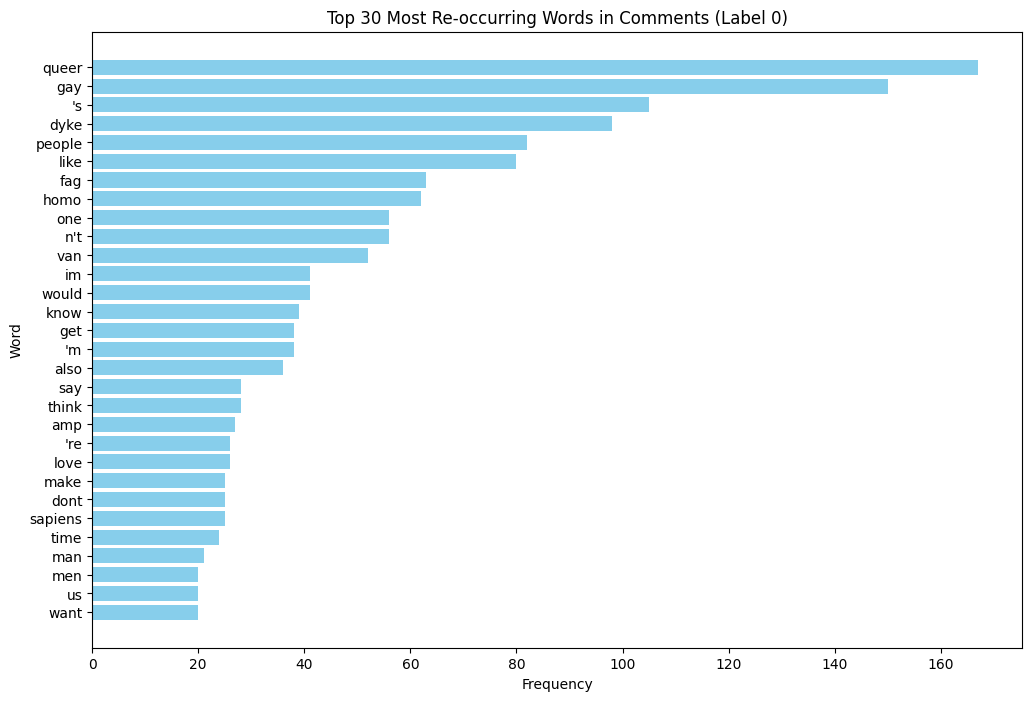

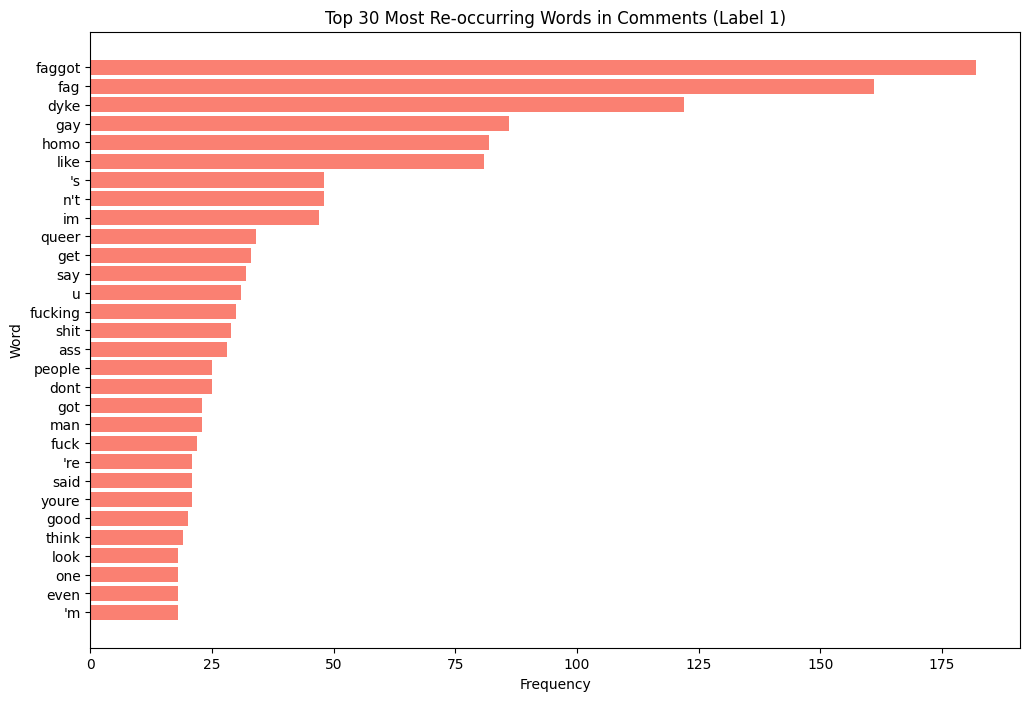

Top 30 Most Re-occurring Words in Comments (Label 0):
       Word  Frequency
0     queer        167
1       gay        150
2        's        105
3      dyke         98
4    people         82
5      like         80
6       fag         63
7      homo         62
8       one         56
9       n't         56
10      van         52
11       im         41
12    would         41
13     know         39
14      get         38
15       'm         38
16     also         36
17      say         28
18    think         28
19      amp         27
20      're         26
21     love         26
22     make         25
23     dont         25
24  sapiens         25
25     time         24
26      man         21
27      men         20
28       us         20
29     want         20
Top 30 Most Re-occurring Words in Comments (Label 1):
       Word  Frequency
0    faggot        182
1       fag        161
2      dyke        122
3       gay         86
4      homo         82
5      like         81
6        's       

In [ ]:
!pip install transformers pandas torch datasets scikit-learn nltk

import pandas as pd
from datasets import load_dataset
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import re

nltk.download('punkt')
nltk.download('stopwords')

ds = load_dataset("JoshMcGiff/HomophobiaDetectionTwitterX")
df = ds['train'].to_pandas()

# Rename columns for easier reference
df.columns = ['label', 'comment', 'language']

# Define text cleaning and tokenization function
def clean_and_tokenize(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove @ and #
    text = re.sub(r'\@\w+|\#','', text)
    # Remove emojis
    text = text.encode('ascii', 'ignore').decode('ascii')
    # Remove special characters, numbers, punctuations (except for ')
    text = re.sub(r"[^A-Za-z\s']", '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    clean_tokens = [word for word in tokens if word not in stop_words]
    return clean_tokens

# Tokenize comments based on labels and count word frequencies
def get_word_frequencies_by_label(df, label_value):
    all_words = []
    filtered_df = df[df['label'] == label_value]
    for comment in filtered_df['comment']:
        all_words.extend(clean_and_tokenize(comment))
    word_freq = Counter(all_words)
    return word_freq

word_freq_label_0 = get_word_frequencies_by_label(df, 0)
word_freq_label_1 = get_word_frequencies_by_label(df, 1)

# Get the top 30 most re-occurring words and their frequencies for each label
most_common_words_label_0 = word_freq_label_0.most_common(30)
most_common_words_label_1 = word_freq_label_1.most_common(30)

#Convert to DataFrame for easier plotting
word_freq_df_label_0 = pd.DataFrame(most_common_words_label_0, columns=['Word', 'Frequency'])
word_freq_df_label_1 = pd.DataFrame(most_common_words_label_1, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 8))
plt.barh(word_freq_df_label_0['Word'], word_freq_df_label_0['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 30 Most Re-occurring Words in Comments (Label 0)')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(12, 8))
plt.barh(word_freq_df_label_1['Word'], word_freq_df_label_1['Frequency'], color='salmon')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 30 Most Re-occurring Words in Comments (Label 1)')
plt.gca().invert_yaxis()
plt.show()

print("Top 30 Most Re-occurring Words in Comments (Label 0):")
print(word_freq_df_label_0)

print("Top 30 Most Re-occurring Words in Comments (Label 1):")
print(word_freq_df_label_1)


Here we are analyzing the most common words used in the labels' 0 & 1 comments, providing insights on the initial state of them. This allowed us to see how we could clean them and so which stop words and connecting words/phrases we would have to take out to remove bias and allow the model to learn on the dataset better, as you can see below. This is done in both labels to give an overall more balanced and relevant datase.

In [ ]:


keywords_list = keywords_df['keyword'].tolist()
df['keyword'] = df['1'].apply(lambda x: [keyword for keyword in keywords_list if keyword in x])

dataset_exploded = df.explode('keyword').dropna(subset=['keyword'])

keyword_counts = dataset_exploded.groupby(['keyword', '0']).size().unstack(fill_value=0)

keyword_counts['total'] = keyword_counts.sum(axis=1)
keyword_counts = keyword_counts[keyword_counts['total'] >= 5]

keyword_counts.columns = ['class_0_count', 'class_1_count', 'total_count']

keyword_counts = keyword_counts.sort_values(by='total_count', ascending=False)

print(keyword_counts[['class_0_count', 'class_1_count']])

KeyError: '1'

To address this imbalance, we use a data augmentation approach by generating more phrases through word substitution. For example, we replace words like "faggot" with "gay" in all relevant phrases. Thus, if the original phrase "fucking faggot" is labeled as 1 (homophobic), we generate an additional phrase "fucking gay" with the same label. This helps to ensure a more balanced representation of keywords across labels, leading to a more accurate model performance.

### replacing the keywords and generate each phrase

In [ ]:

frequent_keywords = keyword_counts.index.tolist()
frequent_tweets = dataset_exploded[dataset_exploded['keyword'].isin(frequent_keywords)]

def replace_keyword(text, original_keyword, new_keyword):
    return text.replace(original_keyword, new_keyword)
augmented_data = []
for _, row in frequent_tweets.iterrows():
    original_text = row['1']
    original_keyword = row['keyword']
    target = row['0']
    for new_keyword in frequent_keywords:
        if new_keyword != original_keyword:
            new_text = replace_keyword(original_text, original_keyword, new_keyword)
            augmented_data.append({'1': new_text, '0': target, 'keyword': new_keyword})

augmented_df = pd.DataFrame(augmented_data)

balanced_dataset = pd.concat([df, augmented_df], ignore_index=True)

print(balanced_dataset.head())

Here we are aiming to create an augmented dataset by replacing frequently occurring keywords in tweets with other frequent keywords, generating new variations of tweets, and then concatenating these new tweets with the original dataset to create a balanced dataset.
We will see that this process of creating a more balanced dataset by increasing the variety of tweets will be particularly useful for training our model.



In [ ]:
#verify the balanced
balanced_dataset_exploded = balanced_dataset.explode('keyword').dropna(subset=['keyword'])
balanced_keyword_counts = balanced_dataset_exploded.groupby(['keyword', '0']).size().unstack(fill_value=0)

balanced_keyword_counts['total'] = balanced_keyword_counts.sum(axis=1)
balanced_keyword_counts = balanced_keyword_counts[balanced_keyword_counts['total'] >= 5]
balanced_keyword_counts.columns = ['class_0_count', 'class_1_count', 'total_count']
balanced_keyword_counts['class_0_ratio'] = balanced_keyword_counts['class_0_count'] / balanced_keyword_counts['total_count']
balanced_keyword_counts['class_1_ratio'] = balanced_keyword_counts['class_1_count'] / balanced_keyword_counts['total_count']

print(balanced_keyword_counts[['class_0_count', 'class_1_count', 'class_0_ratio', 'class_1_ratio']])

As we can see, it worked quite well, as we now have a balanced ratio between both labels.

In [ ]:

first_three_columns = balanced_dataset.iloc[:, :3]
balanced_dataset = Dataset.from_pandas(first_three_columns)
balanced_dataset_dict = DatasetDict({'train': balanced_dataset})
balanced_dataset_dict

### Clean the dataset


Tweets are not just unstructured data but also informal and noisy. In this step, data cleaning is performed to improve the quality of the text data. URLs, mentions (@), emojis, special characters, and stop words are removed. This process reduces noise and allows for a focus on the meaningful content of the tweets.

Additionally, lemmatization is applied to convert words to their base or root form. This standardizes different variations of a word, ensuring that the model treats them as a single term. For example, words like "running," "ran," and "runs" are all lemmatized to "run." This step is crucial for enhancing the model's ability to understand and analyze the core meaning of the text.

---

In [ ]:

def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    text = re.sub(r'\@\w+|\#','', text)

    text = text.encode('ascii', 'ignore').decode('ascii')

    text = re.sub(r"[^A-Za-z\s']", '', text)

    text = text.lower()

    tokens = word_tokenize(text)

    lemmatizer = WordNetLemmatizer()

    stop_words = set(stopwords.words('english'))
    clean_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    clean_text = ' '.join(clean_tokens)
    return clean_text
def clean_twitter_data_dict(data_dict):
    cleaned_data_dict = {}
    for key in data_dict.keys():
        labels = data_dict[key]['0']
        tweets = data_dict[key]['1']
        cleaned_tweets = [clean_text(tweet) for tweet in tweets]

        cleaned_data_dict[key] = {'0': labels, '1': cleaned_tweets}
    return cleaned_data_dict

cleaned_data_dict = clean_twitter_data_dict(balanced_dataset_dict)

cleaned_dataset_dict = DatasetDict({
    key: Dataset.from_dict(cleaned_data_dict[key]) for key in cleaned_data_dict.keys()
})



In [ ]:
cleaned_dataset_dict

### Tokenize with the model tokenizer and split the dataset

 The tokenizer of the model is a tool that converts the cleaned text into a format that the model can process. Essentially, it breaks down the text into smaller units, such as words or subwords, and assigns each unit a unique numerical identifier. For example, the sentence "I love running" might be tokenized into [1, 2, 3], where each number corresponds to a word in the model's vocabulary.

The tokenizer ensures that the text is in a consistent format, which is essential for the model to learn patterns and make accurate predictions. By preprocessing the text data through cleaning and tokenization, the model can more effectively understand and analyze the tweets, leading to better performance and more reliable results.

In [ ]:

df = pd.DataFrame(dataset['train'])


def get_token_length(text):
    return len(tokenizer.tokenize(text))

df['token_length'] = df['1'].apply(get_token_length)

max_length = df['token_length'].max()
average_length = df['token_length'].mean()
median_length = df['token_length'].median()
percentile_90 = np.percentile(df['token_length'], 90)

print(f"Maximum token length: {max_length}")
print(f"Average token length: {average_length}")
print(f"Median token length: {median_length}")
print(f"90th percentile token length: {percentile_90}")

In [ ]:

def tokenize_function(examples):
    return tokenizer(examples['1'], padding='max_length', truncation=True, max_length=159)


tokenized_datasets = cleaned_dataset_dict.map(tokenize_function, batched=True)
tokenized_datasets.set_format('torch', columns=['input_ids', 'attention_mask', '0'])

train_test_split = tokenized_datasets['train'].train_test_split(test_size=0.1)
train_dataset = train_test_split['train']
val_dataset = train_test_split['test']


train_dataset = train_dataset.rename_column('0', 'labels')
val_dataset = val_dataset.rename_column('0', 'labels')




In [ ]:
train_dataset

In [ ]:
val_dataset

### train


The `TrainingArguments` class is used to configure the training process for the model. Here's a breakdown of what each parameter does:

1. **Epochs**: Is the number of complete passes through the entire training dataset. In this setup, the model will go through the dataset 3 times. Each epoch allows the model to learn from the data multiple times, which helps improve its performance. Its important to not set a high model to avoid overfitting.

2. **Batch Size**: For training, the batch size is set to 4, meaning the model will process 4 samples at a time during training. For evaluation. Smaller batch sizes may lead to more stable training but take longer to complete an epoch, while larger batch sizes can speed up training but may require more memory.

3. **Warmup Steps**: Specifies the number of steps to gradually increase the learning rate from zero to its initial value. In this case, the first 500 steps will be used as the warmup phase. This helps stabilize training at the beginning by preventing the model from making large updates to the weights that could destabilize learning.

4. **Weight Decay**: Applies a small penalty to the weights, which prevents them from growing too large. This encourages the model to find simpler and more general solutions, reducing the risk of overfitting to the training data.





In [ ]:
model

In [ ]:


training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    report_to=[]
)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    accuracy = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')


    if len(np.unique(labels)) > 2:
        roc_auc = None
    else:
        roc_auc = roc_auc_score(labels, pred.predictions[:, 1])

    return {
        'accuracy': accuracy,
        'f1': f1,
        'roc_auc': roc_auc
    }


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics = compute_metrics
)

This script ensures the complete workflow from data loading and cleaning to training and evaluating the HateBERT model, using the cleaned dataset.

In [ ]:
train_result = trainer.train()

### Test the model

Interacting with the model to understand how it is working and inputing phrases.

In [ ]:

trainer.save_model("trained_model")

classifier = pipeline("text-classification", model="trained_model", tokenizer=tokenizer)

test_phrase = "i hate ice cream"
prediction = classifier(test_phrase)

print(prediction)


Because the approach involved using the same sentence multiple times with slight variations, the calculated accuracy is helpful but not entirely trustworthy. This is due to overfitting, as the model has seen the data it was evaluated on, leading to potentially inflated performance metrics. To address this issue and obtain a more reliable evaluation of the model, a new dataset was created. This dataset consists of 50 homophobic tweets and 50 non-homophobic tweets, all of which are completely unseen by the model. Testing the model on this new dataset ensures that the evaluation reflects the model's true generalization ability and provides a more accurate assessment of its performance on real-world data.

In [ ]:
trainer.model

In [ ]:

model = trainer.model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


file_path = '/content/drive/My Drive/test_tweets.xlsx'
df = pd.read_excel(file_path)

print(df.head())



df['tweet'] = df['tweet'].apply(clean_text)

def tokenize_function(tweet):
    return tokenizer(tweet, padding='max_length', truncation=True, max_length=128)


tokenized_datasets = df['tweet'].apply(lambda x: tokenize_function(x))

input_ids = torch.tensor([tokenized['input_ids'] for tokenized in tokenized_datasets])
attention_mask = torch.tensor([tokenized['attention_mask'] for tokenized in tokenized_datasets])

input_ids = input_ids.to(device)
attention_mask = attention_mask.to(device)

def get_prediction(input_ids, attention_mask):
    model.eval()
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    return predictions

predictions = get_prediction(input_ids, attention_mask)

df['predicted_label'] = predictions.cpu().numpy()

print(df.head())


accuracy = accuracy_score(df['label'], df['predicted_label'])
print(f'Accuracy: {accuracy}')



When tested on this new dataset, the model achieved an accuracy of 87%, meaning it correctly classified 87 out of the 100 tweets. This high accuracy indicates that the model is effectively understanding and analyzing the context of the tweets, rather than just focusing on specific words. This demo, tested on basic tweets, confirms that the model is working correctly on unseen data and is able to generalize well to new examples.

In previous versions, without trying the balancing of words the accuracy was 77% which can be seen here: https://colab.research.google.com/drive/1EAOZ_IgOiV4VIeLChWhDm4GtcT6ncO5l?usp=sharing

# Deploy to Streamlit



*   Push model to HugginFace hub
*   Deploy it on Streamlit cloud


Why push model on HuggingFace Hub?


*   Deployment Docker file will be smaller
*   Update or re-trained model will be available without redeployment

In [ ]:
!pip install huggingface_hub

In [ ]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification

In [ ]:
# trainer.save_model("trained_model")
model = RobertaForSequenceClassification.from_pretrained("trained_model")

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
model.push_to_hub("gvbl92/HomphobiaDetection-roBERTa")

In [ ]:
model = RobertaForSequenceClassification.from_pretrained("gvbl92/HomphobiaDetection-roBERTa")

In [ ]:
model